In [0]:
def calculateHistrogram (image):
# Calculate gradient 
  gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
  gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)

  # Python Calculate gradient magnitude and direction ( in degrees ) 
  mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
  Hist = np.zeros(360)

  for i in range (angle.shape[0]):
    for j in range(angle.shape[1]):
      Hist[int(angle[i,j,0])] +=1
  inds =[0, 45, 90, 135, 180, 225, 270, 315]
  Hist_eight = Hist[inds]
  return np.array(Hist_eight)

In [0]:
def SSD (des1, des2):
  return np.sum((des1 - des2)*(des1 - des2))

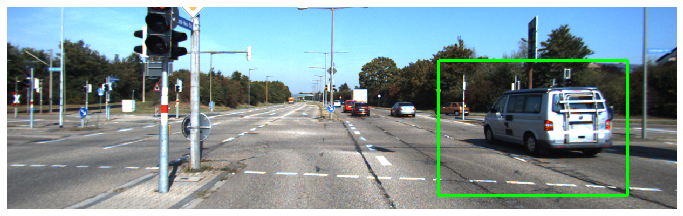

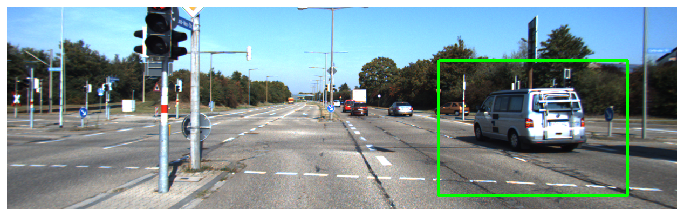

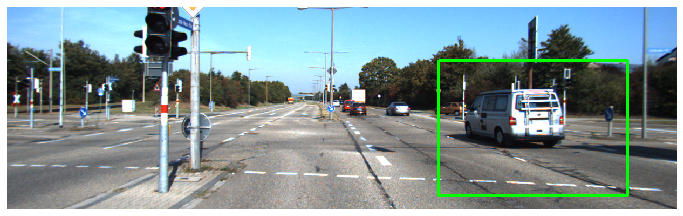

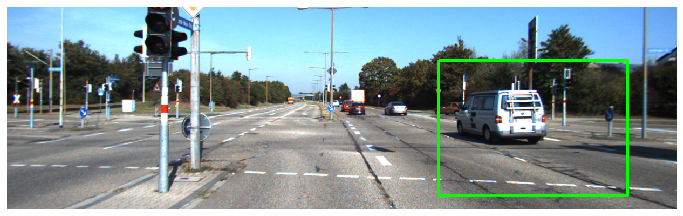

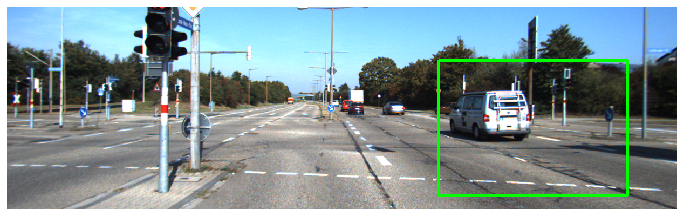

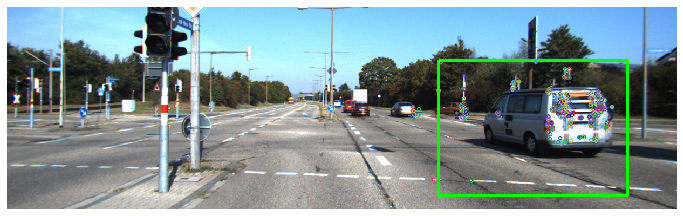

In [152]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import cv2
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)


# image = cv2.imread("0000000130.png")
# cv2.imshow("figure", image)
# cv2.waitKey()
images = ['0000000130.png' , '0000000131.png', '0000000132.png', '0000000133.png', '0000000134.png']
for img in images:
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cv2.rectangle(image,(800,100),(1150,350),(0,255,0),3)
    plt.imshow(image)
    plt.xticks([]),plt.yticks([])
    plt.show()

image = cv2.imread(images[0], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.rectangle(image,(800,100),(1150,350),(0,255,0),3)

image_keypoints = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = np.zeros(gray.shape, np.uint8)
mask[100:350 , 750:1150] = 255
orb = cv2.ORB_create()
kp = orb.detect(gray,mask)
# image_keypoints =cv2.drawKeypoints(image,kp,image_keypoints,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_keypoints =cv2.drawKeypoints(image,kp,image_keypoints,flags=0)

plt.imshow(image_keypoints)
plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
keypoints = []
block_size = 16
step = block_size/4

images_=[]
for img in images:
  image = cv2.imread(img, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.rectangle(image,(800,100),(1150,350),(0,255,0),3)
  images_.append(image)
  
  image_keypoints = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  mask = np.zeros(gray.shape, np.uint8)
  mask[100:350 , 750:1150] = 255
  orb = cv2.ORB_create()
  kp = orb.detect(gray,mask)
  image_keypoints =cv2.drawKeypoints(image,kp,image_keypoints,flags=0)
  keypoints.append(kp)

descriptors_img =[]  
for kp in keypoints:
  descriptor_list = []
  for pk in kp: 
    descriptor = np.zeros(128)
    k=0
    for i in range(4):
      for j in range(4):
        row_min = int(pk.pt[1] -block_size/2 + i* step)
        row_max = int(pk.pt[1] -block_size/2 + (i+1)* step)
        col_min = int(pk.pt[0] -block_size/2 + j* step)
        col_max = int(pk.pt[0] -block_size/2 + (j+1)* step)
        img = image[ row_min : row_max , col_min : col_max , :]
        descriptor[k * 8: (k+1) * 8] = calculateHistrogram(img)
        k +=1
    descriptor_list.append(descriptor)
  descriptors_img.append(descriptor_list) 

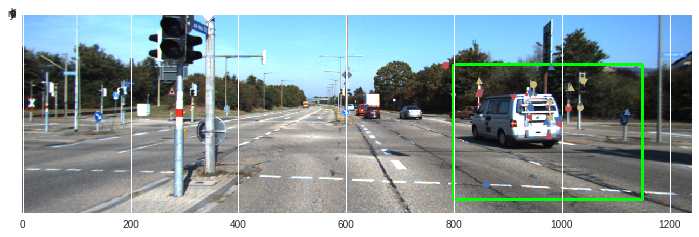

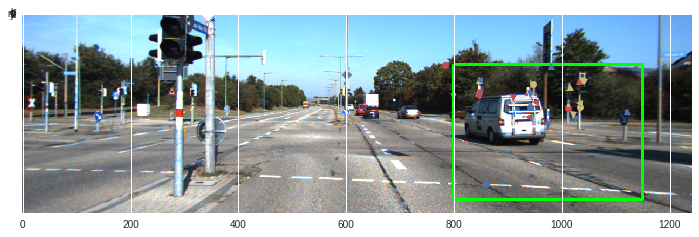

In [161]:
dist = []
img_ind1 =3
img_ind2 =4
ind1 = 78
threshold = 150

markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
colors = ['r','g','b','c','m', 'y', 'k']

markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
colors = ['r','g','b','c','m', 'y', 'k']
design = []
for i in markers:
  for j in colors:
    design.append([i,j])
edges1 = []
edges2 = []

for ind1 in range(100):
  dist = []

  for descriptor in descriptors_img[img_ind2]:
    dist.append(SSD(descriptors_img[img_ind1][ind1], descriptor))

  dist = np.array(dist)
  ind2 = np.argmin(dist)

  if dist[ind2] < threshold: 
    point1 = keypoints[img_ind1][ind1].pt
    point2 = keypoints[img_ind2][ind2].pt

    img=images_[img_ind1].copy()
    x1, y1 = point1

    img=images_[img_ind2].copy()
    x2, y2 = point2


    edges1.append([int(x1),int(y1)])
    edges2.append([int(x2),int(y2)])
  
img1=images_[img_ind1].copy()
img2=images_[img_ind2].copy()

plt.imshow(img1)
for i in range(len(edges1)):
  plt.plot(edges1[i][0],edges1[i][1],design[i][0], design[i][1])
plt.show()

plt.imshow(img2)
for i in range(len(edges2)):
  plt.plot(edges2[i][0],edges2[i][1],design[i][0], design[i][1])